### REPLAY_FREQUENCY set to 8

In [ ]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid

import gym

env = gym.make("LunarLander-v2-mo", render_mode="rgb_array")
env_learning = gym.make("LunarLander-v2-mo")

In [ ]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
hidden_size = 128
BAN_SIZE = 3
max_memory_size=100000
train_start = max_memory_size
use_clipping = True
clipping_tol = 1.0

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=3, max_memory_size=max_memory_size, train_start=1000, use_clipping=use_clipping, clipping_tol=clipping_tol)


c:\Python39\lib\site-packages\gym\utils\passive_env_checker.py:252: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


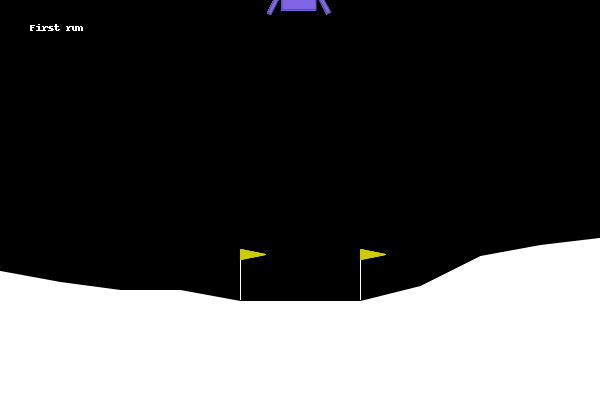

In [ ]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False, verbose=False)
display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

In [ ]:
from IPython.display import Image as IpyImg

NUM_EPISODES = 500
REPLAY_FREQUENCY=8
mname = "fooo.model"

total_rewards = []
total_avg_rewards   = []
total_timings = []

def early_stopping(reward:list)-> bool:
    if sum(reward) >= 200:
    #if reward[1] > 1:
        return True
    return False

THRESHOLD_EXCEEDED_CONSECUTIVELY = 2

rewards, avg_rewards, timings, infos_lists = agent.learning(env=env_learning,episodes=NUM_EPISODES, replay_frequency=REPLAY_FREQUENCY, 
                                                            mname=mname, verbose=True, early_stopping=early_stopping,
                                                            THRESHOLD_EXCEEDED_CONSECUTIVELY=THRESHOLD_EXCEEDED_CONSECUTIVELY)


20:16:01	Episode	1	timesteps:	66	Took	1.532009 sec - reward:	[68.23855903834323, -100.0, -6.329999999999998]	| 100AvgReward: [68.23855903834323, -100.0, -6.329999999999998]
20:16:01	Episode	2	timesteps:	107	Took	0.32199 sec - reward:	[-30.40067468899099, -100.0, -6.779999999999999]	| 100AvgReward: [18.91894217467612, -100.0, -6.554999999999999]
20:16:01	Episode	3	timesteps:	98	Took	0.268245 sec - reward:	[117.21372944827996, -100.0, -7.769999999999999]	| 100AvgReward: [51.6838712658774, -100.0, -6.959999999999998]
20:16:01	Episode	4	timesteps:	91	Took	0.245016 sec - reward:	[56.264350773080324, -100.0, -7.05]	| 100AvgReward: [52.828991142678134, -100.0, -6.982499999999999]
20:16:02	Episode	5	timesteps:	98	Took	0.270001 sec - reward:	[-73.8404749291652, -100.0, -7.1400000000000015]	| 100AvgReward: [27.49509792830947, -100.0, -7.014]
20:16:02	Episode	6	timesteps:	141	Took	0.421985 sec - reward:	[90.5074179949651, -100.0, -14.75999999999999]	| 100AvgReward: [37.99715127275207, -100.0, -8.

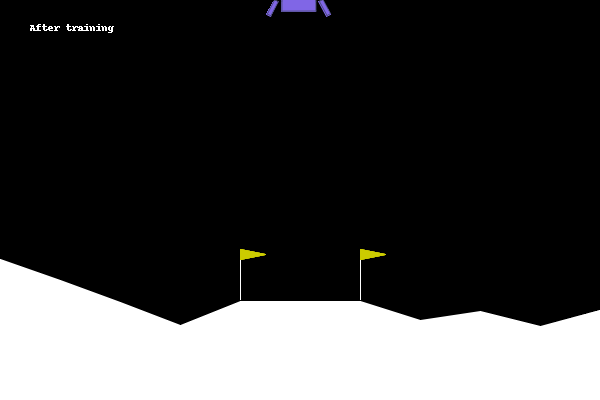

In [ ]:
total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="After training", render=False, verbose=False)
display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

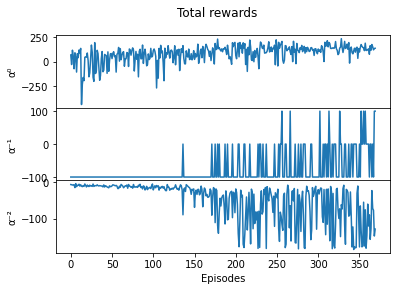

In [ ]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(rewards, len(rewards), "Total rewards")

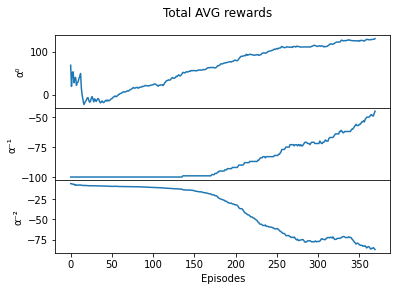

In [ ]:
r = Ban.display_plot(avg_rewards, len(avg_rewards), "Total AVG rewards")

### REPLAY_FREQUENCY set to 8 and early_stopping if total reward reaches 200 at least twice consecutively

In [1]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid

import gym

env = gym.make("LunarLander-v2-mo", render_mode="rgb_array")
env_learning = gym.make("LunarLander-v2-mo")

In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
hidden_size = 128
BAN_SIZE = 3
max_memory_size=100000
train_start = max_memory_size
use_clipping = True
clipping_tol = 1.0

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=3, max_memory_size=max_memory_size, train_start=1000, use_clipping=use_clipping, clipping_tol=clipping_tol)


c:\Python39\lib\site-packages\gym\utils\passive_env_checker.py:252: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


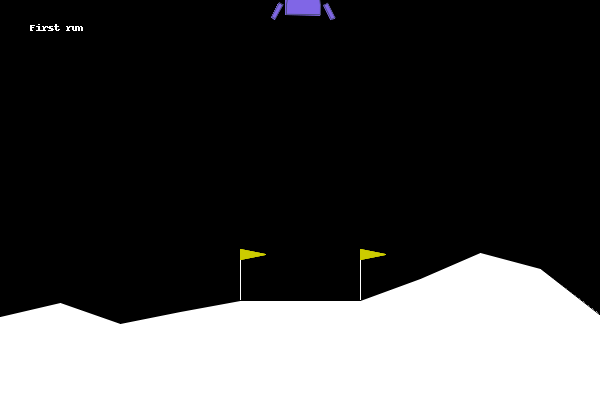

In [3]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False, verbose=False)
display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

In [4]:
from IPython.display import Image as IpyImg

NUM_EPISODES = 500
REPLAY_FREQUENCY=8
mname = "fooo.model"

total_rewards = []
total_avg_rewards   = []
total_timings = []

def early_stopping(reward:list)-> bool:
    if sum(reward) >= 200:
    #if reward[1] > 1:
        return True
    return False

THRESHOLD_EXCEEDED_CONSECUTIVELY = 2

rewards, avg_rewards, timings, infos_lists = agent.learning(env=env_learning,episodes=NUM_EPISODES, replay_frequency=REPLAY_FREQUENCY, 
                                                            mname=mname, verbose=True, early_stopping=early_stopping,
                                                            THRESHOLD_EXCEEDED_CONSECUTIVELY=THRESHOLD_EXCEEDED_CONSECUTIVELY)


22:14:49	Episode	1	timesteps:	99	Took	1.646994 sec - reward:	[-371.80856852517576, -100.0, -10.02]	| 100AvgReward: [-371.80856852517576, -100.0, -10.02]
22:14:50	Episode	2	timesteps:	66	Took	0.179002 sec - reward:	[185.91927693523596, -100.0, -4.049999999999996]	| 100AvgReward: [-92.9446457949699, -100.0, -7.034999999999998]
22:14:50	Episode	3	timesteps:	69	Took	0.193999 sec - reward:	[64.8270758883518, -100.0, -4.139999999999996]	| 100AvgReward: [-40.354071900529334, -100.0, -6.069999999999998]
22:14:50	Episode	4	timesteps:	75	Took	0.202 sec - reward:	[82.9731087653789, -100.0, -6.810000000000001]	| 100AvgReward: [-9.522276734052276, -100.0, -6.254999999999999]
22:14:50	Episode	5	timesteps:	71	Took	0.204015 sec - reward:	[-41.885994173575966, -100.0, -5.489999999999998]	| 100AvgReward: [-15.995020221957015, -100.0, -6.1019999999999985]
22:14:50	Episode	6	timesteps:	81	Took	0.235985 sec - reward:	[78.03823412127781, -100.0, -5.760000000000001]	| 100AvgReward: [-0.32281116475121036, -10

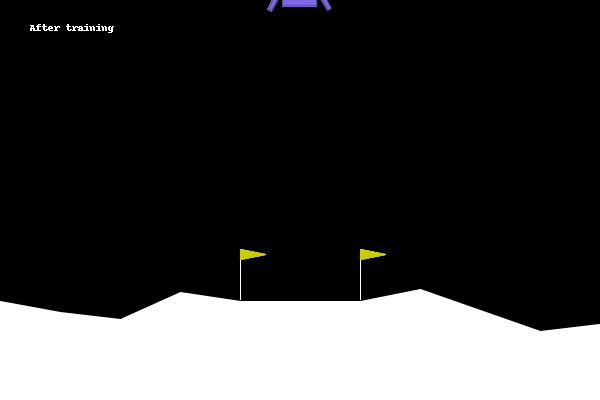

In [5]:
total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="After training", render=False, verbose=False)
display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

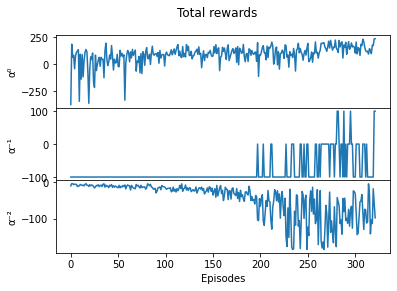

In [6]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(rewards, len(rewards), "Total rewards")

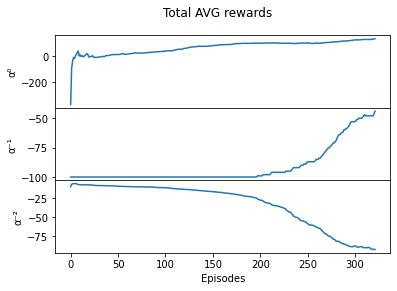

In [7]:
r = Ban.display_plot(avg_rewards, len(avg_rewards), "Total AVG rewards")

tmp

### REPLAY_FREQUENCY set to 4 and early_stopping if total reward reaches 200 at least twice consecutively

In [1]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid

import gym

env = gym.make("LunarLander-v2-mo", render_mode="rgb_array")
env_learning = gym.make("LunarLander-v2-mo")

In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
hidden_size = 128
BAN_SIZE = 3
max_memory_size=100000
train_start = max_memory_size
use_clipping = True
clipping_tol = 1.0

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=3, max_memory_size=max_memory_size, train_start=1000, use_clipping=use_clipping, clipping_tol=clipping_tol)


c:\Python39\lib\site-packages\gym\utils\passive_env_checker.py:252: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


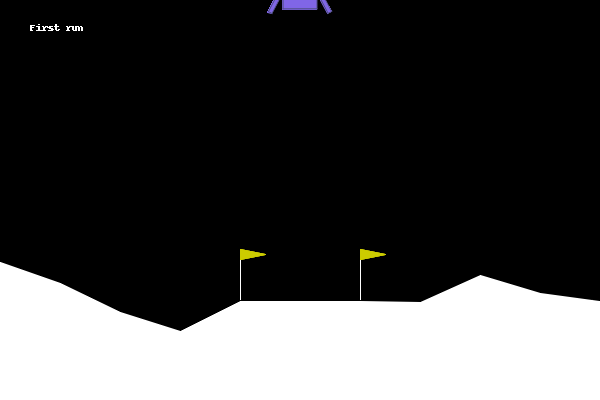

In [3]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False, verbose=False)
display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

In [4]:
from IPython.display import Image as IpyImg

NUM_EPISODES = 500
REPLAY_FREQUENCY=4
mname = "fooo.model"

total_rewards = []
total_avg_rewards   = []
total_timings = []

def early_stopping(reward:list)-> bool:
    if sum(reward) >= 200:
    #if reward[1] > 1:
        return True
    return False

THRESHOLD_EXCEEDED_CONSECUTIVELY = 2

rewards, avg_rewards, timings, infos_lists = agent.learning(env=env_learning,episodes=NUM_EPISODES, replay_frequency=REPLAY_FREQUENCY, 
                                                            mname=mname, verbose=True, early_stopping=early_stopping,
                                                            THRESHOLD_EXCEEDED_CONSECUTIVELY=THRESHOLD_EXCEEDED_CONSECUTIVELY)


23:03:18	Episode	1	timesteps:	70	Took	1.719001 sec - reward:	-47.6312647539539α⁰-100.0α⁻¹-6.99α⁻²	| 100AvgReward: -47.6312647539539α⁰-100.0α⁻¹-6.99α⁻²
23:03:18	Episode	2	timesteps:	72	Took	0.201012 sec - reward:	168.3513450925975α⁰-100.0α⁻¹-4.499999999999999α⁻²	| 100AvgReward: 60.360040169321806α⁰-100.0α⁻¹-5.744999999999999α⁻²
23:03:19	Episode	3	timesteps:	66	Took	0.195005 sec - reward:	84.28921457211591α⁰-100.0α⁻¹-4.049999999999997α⁻²	| 100AvgReward: 68.33643163691984α⁰-100.0α⁻¹-5.179999999999999α⁻²
23:03:19	Episode	4	timesteps:	130	Took	0.374 sec - reward:	98.56726197059184α⁰-100.0α⁻¹-11.100000000000001α⁻²	| 100AvgReward: 75.89413922033785α⁰-100.0α⁻¹-6.659999999999999α⁻²
23:03:19	Episode	5	timesteps:	74	Took	0.213002 sec - reward:	65.92727623002256α⁰-100.0α⁻¹-5.069999999999999α⁻²	| 100AvgReward: 73.9007666222748α⁰-100.0α⁻¹-6.342α⁻²
23:03:20	Episode	6	timesteps:	96	Took	0.327979 sec - reward:	-27.196017899780458α⁰-100.0α⁻¹-9.599999999999996α⁻²	| 100AvgReward: 57.051302535265584α⁰-100.

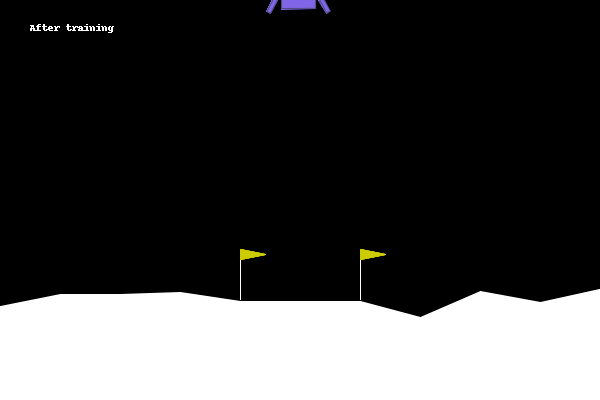

In [5]:
total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="After training", render=False, verbose=False)
display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

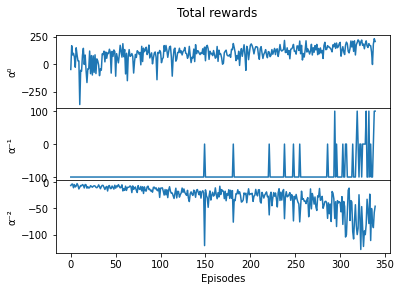

In [6]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(rewards, len(rewards), "Total rewards")

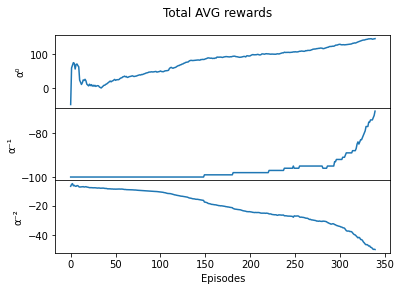

In [7]:
r = Ban.display_plot(avg_rewards, len(avg_rewards), "Total AVG rewards")